In [25]:
import re                                                                        
import numpy as np                                                                
import pandas as pd                                                               


from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder                     
from sklearn.model_selection import train_test_split, cross_validate              
from sklearn.ensemble import RandomForestClassifier                               
from sklearn.tree import DecisionTreeClassifier                                  
from sklearn.svm import SVC, LinearSVC                                           
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression    
from sklearn.neighbors import KNeighborsClassifier                                
from sklearn.naive_bayes import GaussianNB                                       
from xgboost import XGBClassifier                                              
from sklearn.impute import SimpleImputer        
from pandas.io.parsers.readers import DataFrame                                 

#Cargando datasets

In [67]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv') 

In [68]:
train_df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [70]:
train_df_List =  [train_df]


# Analisis Exploratorio de la data

In [71]:
# Todas las columnas
print('Todas las columnas:', list(train_df_List [0].columns))

# columnas tipo Numerica
print('columnas tipo Numerica:', list(train_df_List [0].select_dtypes(exclude = ['object']).columns))

# Columnas tipo categorico
print('Columnas tipo categorico:', list(train_df_List [0].select_dtypes(include = ['object']).columns))

Todas las columnas: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
columnas tipo Numerica: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Columnas tipo categorico: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [72]:
# Validacion de valiables Sex
pd.value_counts(train_df['Sex'])

male      577
female    314
Name: Sex, dtype: int64

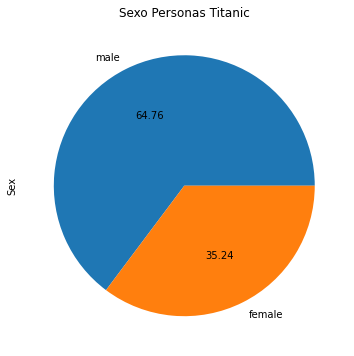

In [73]:
plot = train_df['Sex'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Sexo Personas Titanic')

In [74]:
# Validacion de valiables Embarked
pd.value_counts(train_df['Embarked'])

S    644
C    168
Q     77
Name: Embarked, dtype: int64

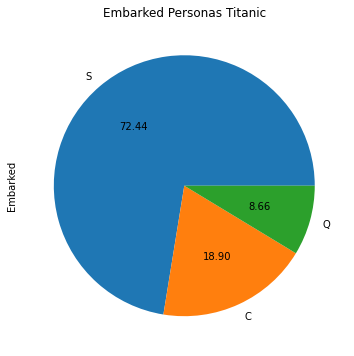

In [75]:
plot = train_df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Embarked Personas Titanic')

In [76]:
#Validando valores nulos
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
combine = [train_df, test_df]

In [78]:
for df in combine:

  # imputacion de la media en edad
  df['Age'].fillna(value = df['Age'].median(), inplace = True)

  # Creacion de 'AgeBin'
  df['AgeBin'] = pd.cut(df['Age'].astype(int), 5).values.astype(str)

  # Removiendo campo Age
  df.drop(columns = ['Age'], inplace = True)

In [79]:
#Imputacion de embarques nulos
for df in combine:
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
  df['Embarked'] = imputer.fit_transform(df['Embarked'].to_numpy().reshape(-1,1))

In [80]:
#Tamaño de familia sobreviviente
for df in combine:
  # Create 'FamilySize' feature
  df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

  # Create 'IsAlone' feature
  df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [81]:
#Eliminando nombre y cabina 
min_count = 10

for df in combine:

  # Title
  df['Title'] = df['Name'].apply(lambda name: re.search(r'([A-Za-z]+)\.', name).group(0))

  title_names = (df['Title'].value_counts() < min_count)
  df['Title'] = df['Title'].apply(lambda x: 'Rare' if title_names.loc[x] == True else x)

  # Drop features
  df.drop(columns = ['Cabin', 'Ticket', 'Name'], inplace = True)

In [82]:
for df in combine:

  # Fix Fare
  df['Fare'].fillna(value = df['Fare'].median(), inplace = True)

  # FareBin
  df['FareBin'] = pd.qcut(df['Fare'], 4).values.astype(str)

  # Drop Fare
  df.drop(columns = ['Fare'], inplace = True)

# Modelado y codificacion de datos

In [83]:
ordinal_features = ['Sex', 'AgeBin', 'FareBin']
categorical_features = ['Embarked', 'Title']
join_feature = ['PassengerId']

encoder = LabelEncoder()

for df in combine:

  # Encode ordinal features
  for feature in ordinal_features:    
    df[feature] = encoder.fit_transform(df[feature])

# Encode categorical features
dummies = pd.get_dummies(train_df[categorical_features + join_feature])
train_df = pd.merge(train_df, dummies, on = "PassengerId")
train_df.drop(columns = categorical_features, inplace = True)

dummies = pd.get_dummies(test_df[categorical_features + join_feature])
test_df = pd.merge(test_df, dummies, on = "PassengerId")
test_df.drop(columns = categorical_features, inplace = True)

In [84]:
# Division de datos
print('Features:', list(train_df.columns))
train_df.head()

Features: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'AgeBin', 'FamilySize', 'IsAlone', 'FareBin', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.', 'Title_Rare']


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,AgeBin,FamilySize,IsAlone,FareBin,Embarked_C,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare
0,1,0,3,1,1,0,1,2,0,0,0,0,1,0,0,1,0,0
1,2,1,1,0,1,0,2,2,0,2,1,0,0,0,0,0,1,0
2,3,1,3,0,0,0,1,1,1,3,0,0,1,0,1,0,0,0
3,4,1,1,0,1,0,2,2,0,2,0,0,1,0,0,0,1,0
4,5,0,3,1,0,0,2,1,1,3,0,0,1,0,0,1,0,0


In [85]:
features = ['Pclass', 'Sex', 'AgeBin', 'FamilySize', 'IsAlone', 'FareBin', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master.', 'Title_Miss.', 'Title_Mr.', 'Title_Mrs.', 'Title_Rare']
target = 'Survived'

train_x = train_df[features]
train_y = train_df[target]
test_x = test_df[features]

In [86]:
#K-Fold Cross Validation
def k_fold(_model):
    return round(cross_validate(_model, train_x, train_y, cv = 5)['test_score'].mean() * 100)

In [87]:
##Modelos
MLA = {
    # Ensemble Methods
    'AdaBoostClassifier': ensemble.AdaBoostClassifier(),
    'BaggingClassifier': ensemble.BaggingClassifier(),
    'ExtraTreesClassifier': ensemble.ExtraTreesClassifier(),
    'GradientBoostingClassifier': ensemble.GradientBoostingClassifier(),
    'RandomForestClassifier': ensemble.RandomForestClassifier(),

    # Gaussian Processes
    'GaussianProcessClassifier': gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    'LogisticRegressionCV': linear_model.LogisticRegressionCV(max_iter = 1000),
    'PassiveAggressiveClassifier': linear_model.PassiveAggressiveClassifier(),
    'RidgeClassifierCV': linear_model.RidgeClassifierCV(),
    'SGDClassifier': linear_model.SGDClassifier(),
    'Perceptron': linear_model.Perceptron(),
    
    # Navies Bayes
    'BernoulliNB': naive_bayes.BernoulliNB(),
    'GaussianNB': naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    'KNeighborsClassifier': neighbors.KNeighborsClassifier(),
    
    # SVM
    'SVC': svm.SVC(probability = True),
    'NuSVC': svm.NuSVC(probability = True),
    'LinearSVC': svm.LinearSVC(),
    
    # Trees    
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
    'ExtraTreeClassifier': tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    'LinearDiscriminantAnalysis': discriminant_analysis.LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis': discriminant_analysis.QuadraticDiscriminantAnalysis(),

    # XGBoost
    'XGBClassifier': XGBClassifier()    
}

# Calculate accuracies
accuracies = []
for name, model in MLA.items():
  accuracy = k_fold(model)
  accuracies.append(accuracy)

# Create DataFrame
accuracy_df = pd.DataFrame(data = accuracies, index = MLA.keys(), columns = ['Accuracy']).sort_values(by = 'Accuracy', ascending = False)
accuracy_df

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Vari

,Accuracy
LinearDiscriminantAnalysis,83
LogisticRegressionCV,83
LinearSVC,83
RidgeClassifierCV,83
NuSVC,83
SVC,83
GradientBoostingClassifier,82
GaussianProcessClassifier,82
AdaBoostClassifier,81
KNeighborsClassifier,81


In [89]:
# Make prediction
model = MLA[accuracy_df.index[0]]
model.fit(train_x, train_y)
pred = model.predict(test_x)

# Submission
submission_df = pd.DataFrame(data = {'PassengerId': test_df['PassengerId'], 'Survived': pred})
submission_df.to_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv', index = False)
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
